<a href="https://colab.research.google.com/github/nike-2001/AI-Hands-on/blob/main/Copy_of_Handwritten_Digit_Recognition_using_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

### Downloading MNIST Train and Test Datasets  
 
* **Proceed to further steps only after executing the cells in this section**.
* The variables from these steps are used in some of the sample test cases.

In [ ]:
# Downloading the datasets using wget
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/mnist_train.csv
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/mnist_test.csv

--2021-01-25 03:05:42--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/mnist_train.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.62.79
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.62.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109575994 (104M) [text/csv]
Saving to: ‘mnist_train.csv’

mnist_train.csv     100%[===================>] 104.50M  13.8MB/s    in 9.2s    

2021-01-25 03:05:52 (11.3 MB/s) - ‘mnist_train.csv’ saved [109575994/109575994]

--2021-01-25 03:05:52--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/mnist_test.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.

In [ ]:
# Checking the last few lines of the downloaded files
!tail mnist_train.csv
!tail mnist_test.csv

9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,107,229,255,254,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,157,242,253,253,165,227,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,130,244,253,184,54,10,1,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,179,253,181,67,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,208,181,99,4,0,0,0,0,4,27,120,200,118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,234,253,73,0,0,0,0,12,73,137,253,253,253,79,0,0,0,0,0,0,0,0,0,0,0,0,0,123,251,151,20,16,61,141,223,226,238,253,253,237,64,5,0,0,0,0,0,0,0,0,0,0,0,0,0,99,249,253,253,253,252,191,150,74,22,242,253,104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,144,53,41,40,0,0,21,202,253,100,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

**NOTE:** Executing the below cell might take some time (1-2 min) as the original MNIST dataset is large.

In [ ]:
file_name = "mnist_train.csv"
data = np.genfromtxt(file_name, delimiter=',', dtype=np.int)
print(f"Shape of the data in {file_name} is: {data.shape} \n")

Shape of the data in mnist_train.csv is: (60000, 785) 



In [ ]:
MNIST_Y = data[:, 0].reshape(-1, 1)
MNIST_X = data[:, 1:]

print(f"Shape of X: {MNIST_X.shape} \n")
print(f"Shape of Y: {MNIST_Y.shape} \n")

Shape of X: (60000, 784) 

Shape of Y: (60000, 1) 



### 1. Ln Norm Distances between two Arrays

Implement the **`Ln_norm_distances()`** function which computes the distance between a testing instance and each of the training instances.


**Arguments**:
* **`train_X`** : Inputs from training data
  * A 2D numpy array of floats where each row represents the input of a training instance

* **`test_x`** : Testing Input
  * A 1D numpy array of floats 

* **`n`** 
  * `n` in the Ln-Norm Distance (>= 1)

**Returns**: 
* Array of distances between testing instance and each of the training instances.
  * A 1D numpy array of floats

**HINT**: 
* You can make use of **`np.abs`**, **`np.sum`** and **`np.power`** methods.

In [ ]:
def Ln_norm_distances(train_X, test_x, n):
    # ADD YOUR CODE HERE


SyntaxError: ignored

In [ ]:
#SAMPLE TEST CASE - 1
train_X = np.array([[6.4, 53.2, 13.6, 0.0],
                   [8, 3.2, -13.6, 5.0],
                   [4, 5.2, 3.6, -9.0]])
test_x = np.array([1.1, 26.2, 3.4, 15.5])
n = 3
distances = Ln_norm_distances(train_X, test_x, n)
print(np.round(distances,4))


**Expected Output**:
```
[29.0901 26.4793 28.8416]
```


In [ ]:
#SAMPLE TEST CASE - 2
train_X = MNIST_X[307:407]
test_x = MNIST_X[789]
n = 3
distances = Ln_norm_distances(train_X, test_x, n)
print(np.round(distances,4))


**Expected Output**:
```
[1129.4165 1262.3648 1063.4474 1075.0119 1156.043  1168.7321 1164.6504
 1231.9049 1053.9743 1157.1013 1207.4119 1157.4291 1106.2678 1146.9765
  796.5887 1195.7953 1261.094  1175.9254 1255.1906 1130.1494  829.6661
 1083.695  1179.6641  969.9507 1148.3287 1132.9348 1170.6434 1186.3345
 1037.713  1102.7552 1188.6005 1137.8926 1237.1169 1089.209  1002.8673
 1030.239  1095.3997 1209.9582 1068.6931  940.467  1180.7639 1053.012
 1174.4854 1177.8004 1084.5534 1118.6905 1124.7611 1124.6212 1089.5625
 1073.6407 1064.9932 1112.8058 1168.6047 1244.4475 1047.1739 1150.7661
 1124.734  1130.0033 1191.8754 1066.6603 1205.6465 1066.979  1144.8678
 1124.1632 1166.4694 1128.5795 1158.3456 1188.719  1257.1978 1124.327
 1135.4052 1177.05   1117.3271 1309.717  1150.0556 1155.1171 1140.4081
 1085.5763 1313.9594 1222.9404 1138.5582 1084.7242 1101.1324 1059.8499
 1134.1731 1189.8706 1179.9734 1143.1622 1172.6661 1013.8943 1067.2264
 1074.593  1160.0227 1171.8602 1082.447  1144.4525  999.1315 1053.9368
  998.6862 1132.6287]

```


### 2. k-nearest Neighbours

Implement the `k_nearest_neighbours()` function which computes the k nearest neighbours of a testing instance.


**Arguments**:
* **`train_X`** : Inputs from training data
  * A 2D numpy array of floats where each row represents the input of a training instance

* **`test_x`** : Testing Input
  * A 1D numpy array of floats

* **`n`** 
  * `n` in Ln-Norm Distance (>=1)

* **`k`** 
  * The number of nearest neighbours to consider. 
  * 1 $\le$ **k** $\le$ number of training instances

**Returns**:
* Indices of k-nearest neighbours to **`test_x`**.
 * A 1D numpy array of `ints`
* Distances of the corresponding k-nearest neighbors from **`test_x`**.
 * A 1D numpy array of `floats`

**NOTE:**   
In case of a distance tie, break the tie by considering all the points equidistant from **`test_x`**. That is, return all the points which are equidistant from **`test_x`**.


**HINT**: 
* You can call **`Ln_norm_distances`** method implemented in the previous question.
* You can make use of **`np.argsort`** method.

In [ ]:
def k_nearest_neighbours(train_X, test_x, n, k):
  # ADD YOUR CODE HERE
  


In [ ]:
#SAMPLE TEST CASE - 1

train_X = np.array([[3.4 ,7.2 ,-9.4, 5.2 ,7.43],
       [18.5, -0.23, 45.2 ,6.3 ,-7.4],
       [101.4 ,56.31 ,46.2, -6.5 ,-0.34],
       [101.4 ,56.31 ,46.2, -6.5 ,-0.34],
       [21.3, -7.45 ,8.91, 4.52, 81.23]
       ])
test_x = np.array([21.1 ,5.6 ,14.32 ,-6.73, -9.37])
n = 4
k = 3
top_indices, top_distances = k_nearest_neighbours(train_X, test_x, n, k)
print(top_indices)
print(np.round(top_distances,4))


**Expected Output**:
```
[0 1 2 3]
[26.784 31.132 83.764 83.764]
```


In [ ]:
#SAMPLE TEST CASE - 2

train_X = MNIST_X[307:407]
test_x = MNIST_X[789]
n = 3
k = 6
top_indices, top_distances = k_nearest_neighbours(train_X, test_x, n, k)
print(top_indices)
print(np.round(top_distances,4))


**Expected Output**:
```
[14 20 39 23 98 96]
[796.5887 829.6661 940.467  969.9507 998.6862 999.1315]
```


### 3. Distance weighted k-NN
Implement the `distance_weighted_knn()` function which predicts the class label for testing instances based on the *'Distance Weighted k-NN'* algorithm discussed in the sessions.


**Arguments**:
* **`train_X`** : Inputs from training data.
  * A 2D numpy array of `floats` where each row represents the input of a training instance

* **`train_Y`** : Outputs from training data (target labels).
  * A 1D numpy array of `ints`

* **`test_X`** : Inputs from testing data for which the class labels have to be predicted.
  * A 2D numpy array of `floats` where each row represents the input of a testing instance


* **`n`** 
  * `n` in Ln-Norm Distance (>=1)

* **`k`** 
  * The number of nearest neighbours to consider.
  * 1 $\le$ **k** $\le$ number of training instances.

**Returns**:
* Predicted labels for `test_X` 
 * A 1D numpy array of ints where $i^{th}$ element is the predicted label for $i^{th}$ element in **`test_X`**

**NOTE:**  
In case of a tie among the weighted votes, break the tie randomly. That is, choose one of the labels which are tied.

**HINT**: 
* You can call **`k_nearest_neighbours`** method implemented in the previous question.
* You can use the **`distance_weighted_voting`** method from the previous assignment.


In [ ]:
def distance_weighted_knn(train_X, train_Y, test_X, n, k):
    # ADD YOUR CODE HERE

In [ ]:
#SAMPLE TEST CASE - 1

train_X = np.array([[3.4, 89, -19.4, 5.2, 7.43],
                    [8.5, -0.6, 45.2, 8.3, -78.4],
                    [10.4, 6.33, 46.2, -6.5, -0.34],
                    [0.5, 41, 66, 2.8, 56.2],
                    [6.3, -7.45, 8.91, 4.56, 81.23]])
test_X = np.array([[21.1, 5.6, 7.32, -6.73, -9.37], [0, 3.42, 51.63, 54.2, -7.3]])
train_Y= np.array([1, 2, 2, 3, 1 ])
n = 2
k = 5
predicted_test_Y = distance_weighted_knn(train_X, train_Y, test_X, n, k)
print(predicted_test_Y)



**Expected Output**:
```
[2 2]
```

In [ ]:
#SAMPLE TEST CASE - 2

train_X = MNIST_X[0:100]
test_X = MNIST_X[100:120]
train_Y = MNIST_Y[0:100].reshape(100,)

n = 2
k = 2
predicted_test_Y = distance_weighted_knn(train_X,train_Y, test_X, n, k)
print(predicted_test_Y)



**Expected Output**:
```
[9 7 1 7 1 1 6 3 0 1 4 3 1 1 0 4 9 2 0 0]
```

### 4. Majority based k-NN
Implement the `majority_based_knn()` function which predicts the class label for testing instances based on the majority label among k-nearest neighbors.

**Arguments**:
* **`train_X`** : Inputs from training data.
  * A 2D numpy array of floats where each row represents the input of a training instance

* **`train_Y`** : Outputs from training data (target labels).
  * A 1D numpy array of ints

* **`test_X`** : Inputs from testing data for which the class labels have to be predicted.
  * A 2D numpy array of floats where each row represents the input of a testing instance

* **`n`** 
  * `n` in Ln-Norm Distance (>=1)

* **`k`** 
  * The number of nearest neighbours to consider.
  * 1 $\le$ **k** $\le$ number of training instances.

**Returns**:
* Predicted labels for `test_X` 
 * A 1D numpy array of ints where $i^{th}$ element is the predicted label for $i^{th}$ element in **`test_X`**

**NOTE:**  
* In case of voting ties, break the ties using the distance weighted voting technique discussed in the session.   
* In case there is a tie even after considering weights, break it randomly.

**HINT**: 
* You can make use of **`np.unique`**, **`np.argsort`**, **`np.max`**, **`np.where`** methods.
* You can call **`k_nearest_neighbours`** method implemented in one of the previous questions.
* You can use the **`distance_weighted_voting`** method from the previous assignment.

In [ ]:
def majority_based_knn(train_X, train_Y, test_X, n, k):
    
    # ADD YOUR CODE HERE
        

In [ ]:
#SAMPLE TEST CASE - 1

train_X = np.array([[3.4, 89, -19.4, 5.2, 7.43],
                    [8.5, -0.6, 45.2, 8.3, -78.4],
                    [10.4, 6.33, 46.2, -6.5, -0.34],
                    [0.5, 41, 66, 2.8, 56.2],
                    [6.3, -7.45, 8.91, 4.56, 81.23]])
test_X = np.array([[21.1, 5.6, 7.32, -6.73, -9.37], [0, 3.42, 51.63, 54.2, -7.3]])
train_Y= np.array([1, 2, 2, 3, 1 ])
n = 2
k = 5
predicted_test_Y = majority_based_knn(train_X, train_Y, test_X, n, k)
print(predicted_test_Y)



**Expected Output**:
```
[2 2]
```

In [ ]:
#SAMPLE TEST CASE - 2

train_X = MNIST_X[0:100]
test_X = MNIST_X[100:120]
train_Y= MNIST_Y[0:100].flatten()

n = 2
k = 2
predicted_test_Y = majority_based_knn(train_X,train_Y, test_X, n, k)
print(predicted_test_Y)


**Expected Output**:
```
[9 7 1 7 1 1 6 3 0 1 4 3 1 1 0 4 9 2 0 0]
```

### 5. Accuracy of k-NN algorithm


Implement the **`calculate_accuracy()`** function which computes the accuracy, given the actual and the predicted labels.

**Arguments**:
* **`predicted_labels`** 
  * A 1D numpy array of ints

* **`actual_labels`** 
  * A 1D numpy array of ints

**Returns**:
* A `float` value which represents the accuracy for given **`predicted_labels`** and **`actual_labels`**

**HINT**: 
* You can make use of **`np.count_nonzero`** method.

In [ ]:
def calculate_accuracy(predicted_labels, actual_labels):
    # ADD YOUR CODE HERE

In [ ]:
#SAMPLE TEST CASE - 1
predicted_labels = np.array([1, 2, 3, 4, 5])
actual_labels= np.array([1, 2, 2, 4, 5])
accuracy = calculate_accuracy(predicted_labels, actual_labels)
print(np.round(accuracy,4))


**Expected Output**:
```
0.8
```

In [ ]:
#SAMPLE TEST CASE - 2

predicted_labels = MNIST_Y[0:100].flatten()
actual_labels = np.concatenate((MNIST_Y[0:70].flatten(), MNIST_Y[100:130].flatten()))
accuracy = calculate_accuracy(predicted_labels, actual_labels)
print(np.round(accuracy,4))


**Expected Output**:
```
0.74
```


### 6. Best `k` and `n` values [Optional]

Implement the **`get_best_k_n_values_using_validation_set()`** function, which returns

1.   the best **`'k'`** value, i.e., the number of nearest neighbors to consider and 

2.   the best **`'n'`** value in Ln-norm distance, i.e, the distance metric which should be used.


**Arguments**:
* **`train_X`** : Inputs from training data.
  * A 2D numpy array of floats where each row represents the input of a training instance

* **`train_Y`** : Outputs from training data (target labels).
  * A 1D numpy array of `ints`

* **`validation_split_percent`** : An `int` which denotes the percentage of `train_X` data that should be used as validation data.

* **`possible_values_for_n`**
  * An `ndarray` of `ints` which represents the values for **`n`** which should be considered when trying to find out the best value of `n` in Ln-norm distances.

**Returns**:
* The best **`k, n`** pair which should be used in the k-NN algorithm for the given data.
  * A 1D numpy array of `ints` where the $1^{st}$ element is the **`k`** value and the second element is the **`n`** value.

**NOTE:**  
1. Shuffle the given training data before splitting it into training set and validation set.  
2. From the shuffled training set,

> 1. The first $math.floor(\frac{100-P}{100}*M)$ number of instances should be used as the training set.  
> 2. The remaining instances should be used as the validation set.  

> Here, $P$ is the `validation_split_percent` and $M$ is the number of instances in `train_X`.

3. Use the **`majority_based_knn()`** function that is implemented in the $4^{th}$ problem to predict labels using k-NN.
4. For choosing the best value for $k$, try all possible values from 1 to number of instances in training set.<br>
For the choosing best value for $n$, try values mentioned in the `possible_values_for_n` array. <br> <br>

5. In case of a tie (same accuracies), return the **`(k, n)`** pair with the least value of **`'n'`**. If the **`'n'`** values of two or more such pairs are also the same, then return the **`(k, n)`** pair with the least value of **`'k'`** among such pairs. <br> <br>


**HINT:**  
* Use the hyperparameter tuning technique discussed in the sessions. That is, iteratively try various combinations of hyperparameter values and pick the values that give the best performance.  <br><br>

* You can make use of **`np.argsort`** method.
* You can call **`calculate_accuracy`** method implemented in the previous question.

In [ ]:
import math
def shuffle(X, Y):
  np.random.seed(2) # DONT CHANGE THIS
  # ADD CODE HERE TO SHUFFLE X, Y using numpy functions

def get_best_k_n_values_using_validation_set(train_X, train_Y, validation_split_percent,possible_values_for_n):
    
    # ADD YOUR CODE HERE


In [ ]:
#SAMPLE TEST CASE - 1

train_X = np.array([[14.4, 14.3, -18.3], 
                    [11.43, -16.42, 3.78], 
                    [15.6, 12.3, 14.6]])
train_Y= np.array([0, 0, 1])
validation_split_percent = 20
n = np.array([1,2,3,4])
best_k_n = get_best_k_n_values_using_validation_set(train_X, train_Y, validation_split_percent, n)
print(best_k_n)


**Expected Output**:
```
[1 4]
```

In [ ]:
#SAMPLE TEST CASE - 2

train_X = MNIST_X[568:678]
train_Y= MNIST_Y[568:678].reshape(110,)
validation_split_percent = 30
n = np.array([1,2,3])
best_k_n = get_best_k_n_values_using_validation_set(train_X, train_Y, validation_split_percent, n)
print(best_k_n)


**Expected Output**:
```
[1 2]
```

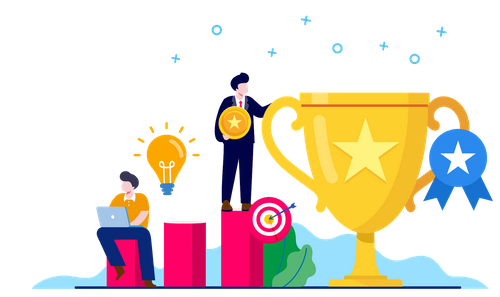

**Hurray!! You have implemented your first Machine Learning algorithm!** <br>
**Many more to come!**